# PyGeM
## Tutorial 4: Inverse Distance Weighting interpolation technique on a cube

In this tutorial we will show how to use the Inverse Distance Weighting interpolation technique to deform a cube.

First of all, we import the required class, the numpy package and we set matplotlib for the notebook.

In [1]:
import platform
import sys
import logging
import numpy as np

# Setup logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)


# System info
logging.info(f"Python Version: {sys.version}")
logging.info(f"Platform: {sys.platform}")
logging.info(f"System: {platform.system()} {platform.release()}")

# Import PyGeM
try:
    import pygem
except ImportError:
    raise ImportError(
        "PyGeM not found. Please install it  before running this tutorial.\n"
        "For example, run: pip install -e '.[tut]' in your environment."
    )

logging.info(f"PyGeM version: {pygem.__version__}")

np.random.seed(42)

%matplotlib inline
import matplotlib.pyplot as plt

from pygem import IDW

2025-11-26 22:18:55,024 - INFO - Python Version: 3.9.25 (main, Nov  3 2025, 22:33:05) 
[GCC 11.2.0]


2025-11-26 22:18:55,025 - INFO - Platform: linux


2025-11-26 22:18:55,025 - INFO - System: Linux 6.12.0-55.41.1.el10_0.x86_64


2025-11-26 22:18:55,465 - INFO - PyGeM version: 2.0.0


We need to set the deformation parameters: we can set manually, by editing the `IDW` attributes, or we can read them by parsing a file. We remark that it is possible to save the parameters (for example, after set them manually) to a file in order to edit this for the future deformations.

In [2]:
import os

# find the possible path of the parameter file depending on the working directory
possible_paths = [
    "../tests/test_datasets/parameters_idw_cube.prm",  # when run from tutorial4/
    "tests/test_datasets/parameters_idw_cube.prm",  # when run from tutorials/
    "../../tests/test_datasets/parameters_idw_cube.prm",  # when run from PyGeM root
]

parameters_file = None
for p in possible_paths:
    if os.path.isfile(p):
        parameters_file = p
        break

if parameters_file is None:
    raise FileNotFoundError(
        "Could not find parameters_idw_cube.prm in expected locations."
    )

idw = IDW()
idw.read_parameters(filename=parameters_file)

The following is the parameters file for this particular case. The Inverse Distance Weighting section describes the power parameter (see the documentation of the [IDW](http://mathlab.github.io/PyGeM/idw.html) class for more details). As control points we consider the 8 vertices of the cube (the first one is not exactly the vertex), and we move 3 of them. In the Control points section there are all the coordinates of the control points.

In [3]:
%cat '../tests/test_datasets/parameters_idw_cube.prm'

cat: ../tests/test_datasets/parameters_idw_cube.prm: No such file or directory


Here we create a $10 \times 10 \times 10$ lattice to mimic a cube.

In [4]:
nx, ny, nz = (10, 10, 10)
mesh = np.zeros((nx * ny * nz, 3))

xv = np.linspace(0, 1, nx)
yv = np.linspace(0, 1, ny)
zv = np.linspace(0, 1, nz)
z, y, x = np.meshgrid(zv, yv, xv)

mesh = np.array([x.ravel(), y.ravel(), z.ravel()])
mesh = mesh.T

Now we plot the points to see what we are doing.

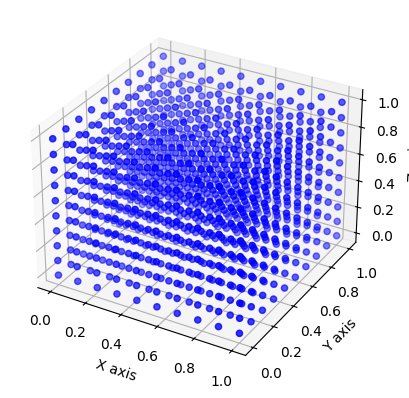

In [5]:
fig = plt.figure(1)
ax = fig.add_subplot(111, projection="3d")
ax.scatter(mesh[:, 0], mesh[:, 1], mesh[:, 2], c="blue", marker="o")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")
plt.show()

Finally we perform the IDW interpolation using the IDW class.

In [6]:
new_mesh = idw(mesh)

We can plot the new points in order to see the deformation. Try different powers to better fit your specific problem.

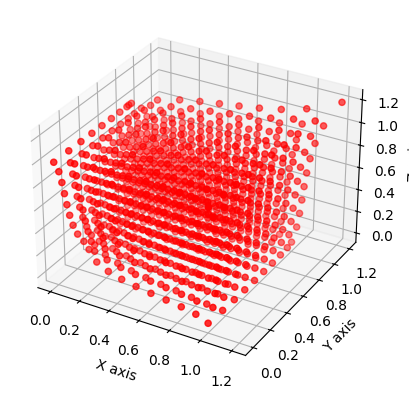

In [7]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection="3d")
ax.scatter(new_mesh[:, 0], new_mesh[:, 1], new_mesh[:, 2], c="red", marker="o")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")
plt.show()